#  <font color=navy>  Report 6: Training a neural net for image classification. </font>
#### <font color=navy>  Submitted By :  Dipen Chovatiya </font>
#### <font color=navy>  Date: 11/20/2018 </font>

## <font color=navy> l. Introduction </font>
In this report we will try to train a neural network for images of  handwritten digits using Python. There are couple of ways to to achieve this goal such as Feature Engineering ,Regression, Neural Network etc. For this report we will use one layered neural network.The task of recognizing an image of digit is very simple to our brain, but if we were to design a brain like structure made up of neurons which doesn't only recognize the image of digit but also improves itself to optimize future tasks, is quite complex.Our objective is to design such a system.

#### <font color=navy>  Neural Network </font>
Artificial neural network or Neural Network is the brain like structure of code made up of thousands of neurons each holding some small value. The decisions in such structures are made from the values of all the neurons.Also,values of these neurons changes with every new information that we feed. So in a way they are adapting to the new changes and hence learning it self.

#### <font color=navy>  Skeleton of the report </font>
To begin with we have around 60000 images of handwritten digits from mnist dataset. We will feed this images into a Neural Network.First layer is the input layer , which pre-process the image and pass it onto a hidden layer. This hidden layer uses the previously stored information to make the best prediction about the image and lights up a specific neuron in output layer to display the result.We will then use back propagation to change the values in the neuron in the hidden layer that will be used to make decisions about future images.Refer following image :
![skeleton](skeleton.png)
## <font color=navy> ll. Importing necessary packages </font>




In [70]:
from PIL import Image   # For handling image related task. such as open,preview and create image. 
import glob  # Used for retriving all the file using matching certain pattern.
import numpy as np  # Add various features for array , matrices and other high-level mathematics functions.
import matplotlib.pyplot as plt  # Pythons 2D plotting Library for plotting graphs
import mnist # used for importing handwritten images from mnist dataset
import pandas # just to display it nicely in Jupyter

##  <font color=navy>III. Input of Neural Network </font>

Each pixel represent neuron and the gray color value of pixels represents values of neuron.We will reshape the initial pixel matrix of the image to get a resultant matrix with each column containing pixels of one image and with total columns equal to total number of images. Below diagram illustrate that. 
![Input_Layer](Input_Layer.png)

In [71]:
training_images = mnist.train_images() # loading training data from mnist
ytrue = training_label = mnist.train_labels() # loading training image labels from mnist
totimages,h,w = training_images.shape # get the shape of the images
X = (training_images.reshape((totimages, h*w))).T # initialize the Input matrix of the neural network
X = X /  X.sum() 
print("Total number of images selected: ",totimages)
print(f'Height of image in pixels :{h}  \nWidth of image in pixels  :{w}')
selection = (np.unique(training_label)).tolist() # list of selected characters
c = len(selection)  # total number of classes or characters that we will be recognizing from 

Total number of images selected:  60000
Height of image in pixels :28  
Width of image in pixels  :28


## <font color=navy> IV. Hidden Layer of the Neural Network </font>

Hidden layer is the backbone of the whole neural network.Neural Networks learns by storing a matrix which will be used to determine the class of future images.Let's call this matrix <b> Weighted Matrix</b> or <b> WT</b>. We will first initialize WT as a some random values.Since this matrix will be used to predict the future outcomes it should be updated every time we feed a new image. This update will be made such that there is least possible error in the future classifications. And to determine that we need to find the error in the first classification or <b> Loss</b>. 

### <font color=navy> i. Weighted Matrix </font>

This weighted matrix will have total rows equal to number of classifications with each row having weighted values of pixels for each class. Basically WT can be considered as the blueprint of images of all classes.

In [72]:
WT = np.random.rand(c,(h*w))  # assign random values to WT matrix
print('Shape of WT : ',WT.shape)

Shape of WT :  (10, 784)


Now we take the DOT product of the weighted matrix WT and input matrix X. The result obtained(S) is the matrix having a specific value for every image with every classification.

In [73]:
S = np.dot(WT,X) 
print("Shape of the S :" ,S.shape)
print("S: \n",S[:5,:5])

Shape of the S : (10, 60000)
S: 
 [[9.33890260e-06 9.79187706e-06 6.20914977e-06 5.32628253e-06
  7.19223864e-06]
 [8.96764216e-06 9.56725027e-06 6.50188017e-06 5.73326693e-06
  7.63343088e-06]
 [9.24202595e-06 1.07249542e-05 6.56055022e-06 5.83989217e-06
  7.92045634e-06]
 [8.55310472e-06 9.28129739e-06 6.10099825e-06 5.51823676e-06
  7.39598525e-06]
 [9.87848139e-06 1.02854898e-05 6.07185639e-06 5.88894005e-06
  7.86740138e-06]]


We will now use the softmax function on S. 
### <font color=navy> ii. Softmax Function and prediction </font>

Softmax or normalized exponential function squashes the values of S into range (0,1). Hence this matrix can be considered as a probability matrix.Softmax is then used for multiclass classification to predicted class for each images and calculate Loss.

In [74]:
def softmax(x): # Defining Softmax function 
    expx = np.exp(x)
    return expx/expx.sum(axis=0) 

P = softmax(S) # Applying Softmax on S

Each image in P will have a highest probability for a particular classification.This classification will be our predicated class for that image.  

In [75]:
ypred = np.argmax(P,axis=0) # get predicted class for all images

let's compare some values of true classification(ytrue) and predicted class(ypred).

In [76]:
print(ytrue[:10]) # true classes for each image
print(ypred[:10]) # predicted classes for each image

[5 0 4 1 9 2 1 3 1 4]
[4 2 2 4 2 2 5 4 4 7]


Confusion matrix defined below helps see the classification and true class for all the images.

In [77]:
def confusion_matrix(ytrue,ypred,classnames):
    c = len(classnames)
    cm = np.zeros((c,c),dtype=int)
    for i,j in zip(ypred,ytrue):
        cm[i,j] += 1
    cmp = pandas.DataFrame(cm)
    cmp.columns = pandas.MultiIndex.from_tuples([('true class'  ,char)   for char in classnames])
    cmp.index   = pandas.MultiIndex.from_tuples([('classification',char) for char in classnames])
    return cmp

In [78]:
confusion_matrix(ytrue,ypred,selection)

true class                                                  \
                          0     1     2     3     4     5     6     7     8   
classification 0        212    28   403   295   201   110    92   252   316   
               1        112    81   167   112   617   292   164   246   171   
               2       2212   685  2619   676  1039   539   537  1813  1518   
               3          4    75    15     3    40    32    13    27    12   
               4         26  2472   462   818   443   831   258  2201  1126   
               5        166   337   879  1003   131   306   726   148   239   
               6         49     4     1    19    55    86   168    67    11   
               7       2350  2698   354  1366  1894  1897  2616   928  1522   
               8        138   300   307  1352  1247   963   398   578   804   
               9        654    62   751   487   175   365   946     5   132   

                        
                     9  
classification 0   222  
               1   194  
               2  1088  
               3    31  
               4  1196  
               5    73  
               6    41  
               7  2018  
               8  1056  
               9    30

We see that almost all the predicted classifications are wrong. This is because our weighted matrix is made up of just random values.


### <font color=navy> iii. Loss </font>

Now we will try to train neural network and change the values of WT to get the correct classifications. To train the network , we first need to find the loss in our current predictions. Loss in the current prediction is the sum of loss of each image. This can be done by first taking out probability of each true class and then perform a negative cross entropy. The total sum of all the values of this cross entropy is the total loss in our current prediction.

In [79]:
Pyi = P[ ytrue, np.arange(totimages) ]  # select the prob of the true class
li = -np.log(Pyi)           # cross-entropy
L = li.sum()                # this is the loss
print("Loss :",L)

Loss : 138155.1081302953


The loss is very high. We aim to reduce this loss.

### <font color=navy> iv. Backward Propagation </font>

We now find the gradient of the loss. To do this we need to find the partial derivative of Loss(L) with respect to partial derivative of WT. We apply chain rule to find derivatives of each steps involves in finding the loss. In a way we are propagating backwards.we will then update the value of WT according to the stepsize that we that for the gradient decent.

In [80]:
dLdli = np.ones_like(li)   
dLdP = np.zeros_like(P)                     # most will be zero
dLdP[ ytrue, np.arange(totimages) ] = dLdli * (-1/Pyi)  # modify the non-zero element in each row (see fancy indexing note below)
dLdS = np.zeros_like(S)
for m in range(c):             # apply the formula you derived for the derivatives of the softmax function last class
    dLdS += dLdP[m]*(-P[m]*P)  # the "j!=m" terms
dLdS += dLdP*P                 # the "j=m" term
dLdWT = np.dot(dLdS,X.T)  # finally, this is the gradient of the loss

print("Sum of the gradient of Loss (L): ",abs(dLdWT).sum())

Sum of the gradient of Loss (L):  0.5061526891229882


## <font color=navy> IV. Training our Neural Network </font>

We found the gradient of Loss. Now we have to apply this changes to WT with some step size. Below are two functions that we will use for finding loss and loading image data. These functions are actually made form all the previous code we wrote.

In [81]:
def loss(WT,X,y):
    
    nimages = X.shape[1]
    
    # forward pass to compute the loss

    c = WT.shape[0]           # number of classes
    S = np.dot(WT,X)
    P = softmax(S)
    Pyi = P[ y, np.arange(nimages) ]  # select the prob of the true class
    li = -np.log(Pyi)           # cross-entropy
    L = li.sum()                # this is the loss
    
    ypred = np.argmax(P,axis=0)
    
    # back-prop of the gradient of the loss

    dLdli = np.ones_like(li)
    dLdP = np.zeros_like(P)                     # most will be zero
    dLdP[ y, np.arange(nimages) ] = dLdli * (-1/Pyi)  # modify the non-zero element in each row (see fancy indexing note below)
    dLdS = np.zeros_like(S)
    for m in range(c):             # apply the formula you derived for the derivatives of the softmax function last class
        dLdS += dLdP[m]*(-P[m]*P)  # the "j!=m" terms
    dLdS += dLdP*P                 # the "j=m" term
    dLdWT = np.dot(dLdS,X.T)  # finally, this is the gradient of the loss
    
    return L,dLdWT,ypred

def load_data(NN_images,NN_label):
    ytrue = NN_label
    totimages,h,w = NN_images.shape 
    X = (NN_images.reshape((totimages, h*w))).T
    X = X /  X.sum()
    print("Total number of images selected: ",totimages)
    print(f'Height of image in pixels :{h}  \nWidth of image in pixels  :{w}')
    return X,ytrue

### <font color=navy> i. Initial Loss and Confusion Matrix </font>

In [82]:
WT = np.random.rand(c,h*w)  
X,ytrue = load_data(training_images,training_label)
L,dLdT,ypred = loss(WT,X,ytrue)
cmp = confusion_matrix(ytrue,ypred,selection)
print("Loss: ",L)
cmp

Total number of images selected:  60000
Height of image in pixels :28  
Width of image in pixels  :28
Loss:  138155.10449059185


true class                                                  \
                          0     1     2     3     4     5     6     7     8   
classification 0       1121    36   334   298   647  1337   567   428   713   
               1        499  4237   721  1119  1218  1009   356  1521   972   
               2          7    19    15    15   514    18    11   481    15   
               3       1086  1514  2848   479   328   593  2001   606  1194   
               4        589     2   379    29   295   106   147   105    60   
               5        193    69   106   507    63   439   745    76    41   
               6        474    35   195   524   173   293    97   168   254   
               7         25   496    69   227    94   292  1485    51   210   
               8        513   334  1279  2895  2212  1073   460  2777  2354   
               9       1416     0    12    38   298   261    49    52    38   

                        
                     9  
classification 0   563  
               1  1734  
               2   254  
               3   246  
               4   358  
               5    20  
               6   210  
               7    52  
               8  2400  
               9   112

### <font color=navy> ii. Training Neural Network </font>

In [83]:
WT = np.random.rand(c,h*w)  
TrainLosses = [] # store the losses of training images at each iterations
iterations = [] # store all the iterations
TrainPerc = [] # Stores the percentage of accuracy at each iteration
TestLosses = [] # Store the losses of test images
TestPerc = [] # store the percentage of test images

In [84]:
test_images = mnist.test_images()
test_label = mnist.test_labels()

print("Loading Training Data: ")
X,ytrue = load_data(training_images,training_label) 
print("Loading Test Data: ")
Xtest,ytesttrue = load_data(test_images,test_label)
L,gradL,ypred = loss(WT,X,ytrue)
stepsize = 1e8 # stepsize

for i in range(500):  # number of iterations
    iterations.append(i) # store the iteration
    WT += -stepsize*gradL # update the WT with stepisze and gradient of L . negative sign indicates lower decent
    L,gradL,ypred = loss(WT,X,ytrue)
    Ltest,gradLtest,ypredtest = loss (WT,Xtest,ytesttrue)
    TrainLosses.append(L)
    TestLosses.append(Ltest)
    train_correct_percentage = int(100*(ypred==ytrue).sum()/len(ytrue)) 
    test_correct_percentage = int(100*(ypredtest==ytesttrue).sum()/len(ytesttrue))
    if(i%100 == 0): print(f"iteration {i}) L",L , "   " ,train_correct_percentage,'%')
    TestPerc.append(test_correct_percentage)   
    TrainPerc.append(train_correct_percentage)
    
cmp = confusion_matrix(ytrue,ypred,selection)
cmp 

Loading Training Data: 
Total number of images selected:  60000
Height of image in pixels :28  
Width of image in pixels  :28
Loading Test Data: 
Total number of images selected:  10000
Height of image in pixels :28  
Width of image in pixels  :28
iteration 0) L 128246.49494950613     67 %
iteration 100) L 31411.986074561748     87 %
iteration 200) L 26200.52935124514     88 %
iteration 300) L 24015.49596884448     89 %
iteration 400) L 22741.383437209464     89 %


true class                                                  \
                          0     1     2     3     4     5     6     7     8   
classification 0       5695     1    51    28    13   103    41    45    32   
               1          0  6515    70    34    32    56    23    79   162   
               2         28    32  5161   142    42    43    64    98    82   
               3         16    30    96  5335     5   227     6    25   165   
               4         13     6   122     6  5341    78    50    78    26   
               5         40    41    18   253     5  4441    88    10   179   
               6         53     9   116    44    66   114  5588     3    46   
               7          5    16   113    76    13    31     2  5686    34   
               8         65    83   174   140    46   237    53    19  5021   
               9          8     9    37    73   279    91     3   222   104   

                        
                     9  
classification 0    43  
               1    35  
               2    35  
               3    98  
               4   219  
               5    41  
               6     5  
               7   194  
               8    56  
               9  5223

We see that with every iterations the Loss is decreasing and the Accuracy of the Prediction is increasing. Also, Look at the confusion matrix now. We can clearly see that majority of the classifications are correct. If we were to run the code again accuracy of the Neural Network will increase. Hence, there we have a system that learns itself.

### <font color=navy> iii. Testing Neural Network on Test Images </font>

In [85]:
Ltest,gradLtest,ypredtest = loss(WT,Xtest,ytesttrue)

test_correct_percentage = int(100*(ypredtest==ytesttrue).sum()/len(ytesttrue))
print("L",Ltest , "   " ,test_correct_percentage,'%')
confusion_matrix(ytesttrue,ypredtest,selection)

L 8815.559503599823     90 %


true class                                              
                          0     1    2    3    4    5    6    7    8    9
classification 0        957     0   11    5    1   14   16    3    9   10
               1          0  1103    6    0    4    5    3   19    9    7
               2          3     2  896   18    5    4    5   28    9    5
               3          2     4   16  904    1   41    2    4   27   10
               4          0     1   15    1  907   13   13   11    8   43
               5          3     2    0   32    0  741   16    0   27   13
               6         10     4   15    3   11   16  898    0   13    0
               7          1     1   20   15    1   10    1  923   15   25
               8          4    18   45   21    8   40    4    3  843    8
               9          0     0    8   11   44    8    0   37   14  888

We see that our neural network is working very efficiently on our test data with accuracy of 90%. Now lets explore relation between accuracy of testing images 

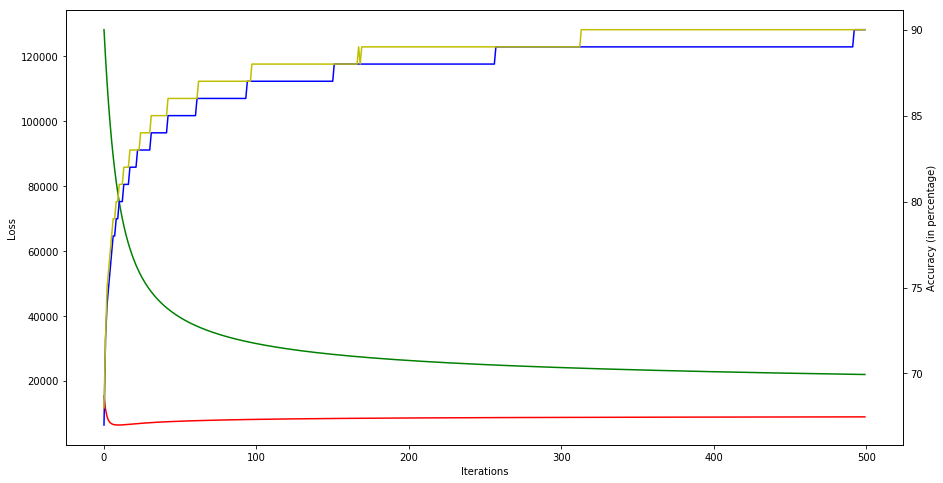

<Figure size 1440x720 with 0 Axes>

In [102]:
fig, ax1 = plt.subplots(figsize=(15,8))

ax2 = ax1.twinx()
ax1.plot(iterations, TrainLosses, 'g-')
ax1.plot(iterations, TestLosses,'r-')
ax2.plot(iterations, TrainPerc, 'b-')
ax2.plot(iterations, TestPerc, 'y-')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Loss')
ax2.set_ylabel('Accuracy (in percentage)')
plt.figure(figsize=(20,10))
plt.show()

## <font color=navy> V. Conclusion </font>

We see that from around 300th iteration the difference between loss in training images and the test images is remaining almost constant from this point onwards even if we train our data more with the training images it will be over fitting of our training data. Which generally is not efficient for future image recognition. We also see that accuracy in the test images goes hand in hand with the accuracy of the training images.

## <font color=navy> VI. Reference </font>

https://www.youtube.com/watch?v=aircAruvnKk

https://en.wikipedia.org/wiki/Softmax_function